In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [88]:
img_gray = cv2.imread('E:/lena.jpg', 0) # 0表示显示灰度图像
cv2.imshow('lena_grey', img_gray)
# 以下三行用于成功显示图片，esc可以直接退出显示
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [89]:
# 显示灰度图像矩阵,数值代表灰度值，明亮程度，越大表示越亮
print(img_gray)

[[131 137 131 ...  96  96  96]
 [132 135 133 ...  96  98  99]
 [134 132 135 ...  98  99 100]
 ...
 [110 109 114 ...  47  47  48]
 [107 109 111 ...  47  47  51]
 [101 107 109 ...  47  48  54]]


In [90]:
# 显示图像矩阵的数据类型，2的8次方为256,so 灰度图的值为0-255
print(img_gray.dtype)

uint8


In [91]:
# 显示图像的shape，行 * 列(像素值)
print(img_gray.shape)

(512, 512)


In [92]:
img = cv2.imread("E:/lena.jpg")
cv2.imshow("lena", img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [93]:
print(img)
print(img.shape) # 彩色图像是三个通道组合成，行*列*通道

[[[ 74 110 194]
  [ 80 116 200]
  [ 74 110 194]
  ...
  [ 55  77 148]
  [ 55  78 146]
  [ 55  78 146]]

 [[ 75 111 195]
  [ 78 114 198]
  [ 76 112 196]
  ...
  [ 55  78 146]
  [ 57  80 148]
  [ 58  81 149]]

 [[ 77 113 197]
  [ 75 111 195]
  [ 78 114 198]
  ...
  [ 55  81 148]
  [ 58  81 149]
  [ 59  83 149]]

 ...

 [[ 60  90 167]
  [ 59  89 166]
  [ 64  94 171]
  ...
  [ 38  38  68]
  [ 36  38  68]
  [ 37  39  69]]

 [[ 57  87 164]
  [ 59  89 166]
  [ 60  92 168]
  ...
  [ 38  38  68]
  [ 36  38  69]
  [ 40  42  73]]

 [[ 51  81 158]
  [ 57  87 164]
  [ 58  90 166]
  ...
  [ 38  38  68]
  [ 37  39  70]
  [ 43  45  76]]]
(512, 512, 3)


In [94]:
#color split 把三个颜色通道分开，分别显示，opencv三个通道分别为B, G, R
B, G, R = cv2.split(img)
cv2.imshow("B channel image", B)
cv2.imshow("G channel image", G)
cv2.imshow("R channel image", R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows() # click Esc to destory all windows

In [95]:
# change color 通过随机改变各通道图像的灰度值，改变合成后图像的颜色
def random_change_color(img):
    """
    输入一副图像，输出一副颜色更改后的图像
    """
    B, G, R = cv2.split(img)
    b_rand = random.randint(-50, 50) # 生成一个随机整数，范围在-50 - 50 
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand # 取值范围在205 - 255
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype) # ?
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
# 以上完成了对于B通道图片的更改
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
# 以上完成了对于G通道图片的更改
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
# 以上完成了对于R通道图片的更改
    img_merge = cv2.merge((B, G, R)) # cv2.merge 表示合并单通道图像成多通道图像
    #img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img_merge

In [96]:
img_random_color = random_change_color(img)
cv2.imshow("img_random_color", img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

*****
## gamma correction

In [97]:
# 读取E盘下存储的图片dark_man
img_dark = cv2.imread("E:/dark_man.jpg")
cv2.imshow("dark_man", img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [98]:
def adjust_gamma(image, gamma=1.0):
    invgamma = 1.0 / gamma
    table = []
    # range(256) -- [0 - 255]
    for i in range(256): 
        table.append(((i / 255.0) ** invgamma) * 255) # 通过这个函数，把低灰度值迅速变亮，高灰度值机会变化不大
    table = np.array(table).astype("uint8")
    """
    LUT -- look up table 查找表  
    cv2.LUT函数第一个参数表示输入图像（单通道or3通道）
    cv2.LUT函数第二个参数表示将输入图像按照这个表进行映射，像素值为0的-->对应table[0]
    """
    return cv2.LUT(img_dark, table)

img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow("img_dark", img_dark)
cv2.imshow("img_brighter", img_brighter)
key = cv2.waitKey()
if key ==27:
    cv2.destroyAllWindows()

In [99]:
for i in range(256): # range(256) -- [0 - 255]
        print((((i / 255.0) ** (1.0/2)) * 255))

0.0
15.968719422671313
22.58317958127243
27.65863337187866
31.937438845342626
35.70714214271425
39.1152144312159
42.24926034855521
45.16635916254486
47.90615826801393
50.49752469181039
52.96225070746144
55.31726674375732
57.57603668193913
59.74947698515862
61.84658438426491
63.87487769068525
65.84071688552608
67.74953874381728
69.60603422117941
71.4142842854285
73.1778655059028
74.89993324429602
76.58328799418317
78.2304288624318
79.84359711335655
81.42481194328913
82.97590011563598
84.49852069711042
85.99418584997477
87.46427842267951
88.91006692158093
90.33271832508971
91.73330910852393
93.11283477587823
94.47221813845593
95.81231653602786
97.13392816107047
98.4377976185977
99.72462083156798
100.99504938362078
102.24969437607136
103.48912986396203
104.71389592599446
105.92450141492289
107.12142642814275
108.30512453249847
109.47602477255009
110.63453348751464
111.78103595869919
112.91589790636215
114.03946685248927
115.15207336387826
116.25403218813531
117.34564329364768
118.42719282

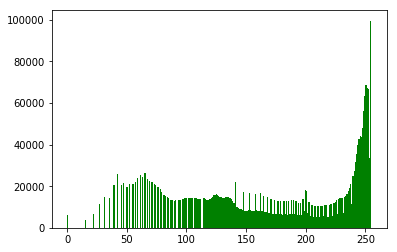

In [100]:
# histogram
# 调整原图片尺寸
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5),int(img_brighter.shape[1]*0.5)))
# print(img_brighter.shape)
# print(img_small_brighter.shape)
# flatten 降维 按行变成数组
# print(img_brighter.flatten())
# print(img_brighter.shape)
# print(img_brighter.flatten().shape)
# 绘制图像直方图
"""
plt.hist -- 第一个参数表示对输入图像进行降维，变成一维
-- 第二个参数表示分成256份绘制
-- 第三个参数表示统计输入数据中[x1, x2]中出现的次数
-- 第四个参数表示颜色
"""
plt.hist(img_brighter.flatten(), 256, [0, 255], color='g')
# plt.hist(img_dark.flatten(), 256, [0, 255], color='g')
# cv2.cvtColor -- Converts an image from one color space to another.
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# 测试img_yuv
# cv2.imshow("c", img_yuv)
# key = cv2.waitKey()
# if key ==27:
#     cv2.destroyAllWindows()
#Equalizes the histogram of a grayscale image.均衡灰度图像的直方图
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
# plt.hist(img_output.flatten(), 256, [0, 255], color='g') # 测试均衡灰度图后的直方图
# cv2.imshow("input image", img_brighter)
# cv2.imshow("Color input image", img_small_brighter)

cv2.imshow("Historgram equalized", img_output)
cv2.imshow("img", img_small_brighter)
key = cv2.waitKey()
if key ==27:
    cv2.destroyAllWindows()

***
rotation

In [101]:
# Calculates an affine matrix of 2D rotation.计算2D旋转的仿射矩阵。
# cv2.getRotationMatrix2D(center, angle, scale)
# center – Center of the rotation in the source image.
# angle – Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
# scale – Isotropic scale factor.
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[1] / 2), 30, 1)
# Applies an affine transformation to an image.对图像应用仿射变换。
# img - input image
# M – 2 * 3 transformation matrix.
# dsize – size of the output image.输出的图像，而不是变换后的输入图像
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
# img_rotate = cv2.warpAffine(img, M, (img.shape[1]*2, img.shape[0]*2)) # 测试调整size输入情况
cv2.imshow("rotatied lena", img_rotate)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(M)

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


In [102]:
# set M[0][2] = M[1][2] = 0
M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


In [103]:
# cv2.getRotationMatrix2D(center, angle, scale)
# scale 决定了变化的图像的尺度
M = cv2.getRotationMatrix2D((img.shape[0]/2, img.shape[1]/2), 30, 0.5)
M2 = cv2.getRotationMatrix2D((img.shape[0]/2, img.shape[1]/2), 30, 1)
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
img_rotate2 = cv2.warpAffine(img, M2, (img.shape[1], img.shape[0]))
cv2.imshow("rotated lena", img_rotate)
cv2.imshow("rotated lena2", img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
print("M="+ str(M))
print("M="+ str(M2))

M=[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]
M=[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


***
**Affine Transform**

In [104]:
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
# Calculates an affine transform from three pairs of the corresponding points.
# 从三对相应的点计算仿射变换。
# cv2.getAffineTransform(src, dst)
# src – Coordinates of triangle vertices in the source image. 源图像中三角形顶点的坐标。
# dst – Coordinates of the corresponding triangle vertices in the destination image.目标图像中相应三角形顶点的坐标。
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
dst2 = cv2.warpAffine(img, M, (img.shape[0], img.shape[1]))

cv2.imshow("affine lena", dst)
cv2.imshow("affine lena2", dst2)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

***
perspective transform -- 透视变换

In [105]:
def random_warp(img, row, col):
    height, width, channels = img.shape
    
    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()